<a href="https://colab.research.google.com/github/RabiatS/ML_DecisionTreeID3/blob/main/ML__DecisionTreeID3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTSA CS 3793/5233: Assignment-3

**Sadiq - Rabiat - (rrw205)**






## Learning Objectives

Implement 2 different machine learning algorithms
*   Stochastic Gradient Descent
*   ID3 Decision Tree



## Description

This assignment is focused on **machine learning**, mainly on the implementation of 2 different algorithms - Stochastic Gradient Descent & ID3 decision tree.
The assignment is divided into two sections, each for one unique ML algorithm.

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library that contains the implementation of ML algorithms. You can get pieces of code from online, but please cite the source properly.


##Import Libraries

Write all the import statements here. This should be for both algorithm implmentations. As mentioned before, you can not use any premade ML libraries.

In [154]:
# import all required libraries
import numpy as np
import pandas as pd
import math
import random
import math


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split # splitting data



In [155]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/sample_data/"


#Stochastic Gradient Descent

In this section, you will implement the Stochastic Gradient Descent algorithm. The training is for a **binary classification** task i.e. each instance will have a class value of 0 or 1. Also, assume that you are given **all binary-valued attributes** and that there are **no missing values** in the train or test data.


##Algorithm

(40 points)

Following are the data files that will be provided to you for the gradient descent algorithm implementation.

*   Training file - 'gd-train.dat'
*   Testing file - 'gd-test.dat'

In these files, only non-space characters are relevant. The first line contains the attribute names. All the other lines are different example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the class label for that instance.

Write the code in the following code block, structure is provided. Instructions on the steps to follow are provided as comments.



In [156]:
# Data file name variables
train = "/content/sample_data/gd-train.dat"
test = "/content/sample_data/gd-test.dat"



In [158]:
# Read training data
#df_train = pd.read_csv(train, sep=" ", header=0)
df_train = pd.read_csv(train,  delimiter='\t')
# print(df_train)

# Read testing data
#df_test = pd.read_csv(test, sep=" ", header=0)
df_test = pd.read_csv(test, delimiter='\t')
# print(df_test)


In [157]:
# Activation Function - implement Sigmoid
def activation_function(h):
    # given 'h' compute and return 'z' based on the activation function implemented

  """Sigmoid activation function """

  # Avoid overflow
  if h < -100:
    return 0

  if h > 100:
    return 1

  # Compute sigmoid
  z = 1 / (1 + math.exp(-h))

  return z

h = 0.5
z = activation_function(h)
# print(z) # 0.6224593312



In [159]:
# Train the model using the given training dataset and the learning rate
# return the "weights" learnt for the perceptron - include the weight assocaited with bias as the last entry


def train(df, learning_rate):
    # Label column name
    y_col = 'C'
    # Convert label to float
    df[y_col] = df[y_col].astype(float)

    # Add bias column
    bias = np.ones((len(df), 1))
    data_with_bias = np.hstack((bias, df.iloc[:, :-1].values))

    weights = np.zeros(len(df.columns))

    for i in range(len(df)):
        # Get data
        x = data_with_bias[i, :]
        y = df.iloc[i, -1]

        # Assertions
        assert isinstance(x, np.ndarray)
        assert isinstance(y, float)

        # Get prediction
        h = np.dot(x, weights)
        z = activation_function(h)

        # Full weight update
        weights -= learning_rate * (z - y) * x

    return weights

# print(train)


In [161]:
# Test the model (weights learnt) using the given test dataset
# return the accuracy value

    # go through each testing data instance
        # get 'x' as one multi-variate data instance and 'y' as the ground truth class label
        # obtain h(x)
        # call the activation function with 'h' as parameter to obtain 'z'
        # use 'threshold' to convert 'z' to either 0 or 1 so as to match to the ground truth binary labels
        # compare the thresholded 'z' with 'y' to calculate the positive and negative instances for calculating accuracy
    # return the accuracy value for the given test dataset

def test(test_data, weights, threshold=0.5):
    bias = np.ones((len(test_data), 1))
    test_data = np.hstack((bias, test_data))

    predictions = []
    for i in range(len(test_data)):
        x = test_data[i, :-1]  # last column (bias column)

        # Get prediction
        h = np.dot(x, weights)
        z = activation_function(h)
        y_pred = 1 if z >= threshold else 0
        predictions.append(y_pred)
    correct = 0
    for i in range(len(test_data)):
        if test_data[i, -1] == predictions[i]:
            correct += 1

    accuracy = (correct / float(len(test_data))) * 100.0

    return accuracy

# print(test)

In [162]:
# Gradient Descent function

    # call the train function to train the model and obtain the weights
    # call the test function with the training dataset to obtain the training accuracy
    # call the test function with the testing dataset to obtain the testing accuracy
    # return (trainAccuracy, testAccuracy)
def gradient_descent(df_train, df_test, learning_rates):


    x_train = df_train.iloc[:, :-1].values
    y_train = df_train.iloc[:, -1].values
    bias_train = np.ones((len(df_train), 1))
    x_train = np.hstack((bias_train, x_train))

    # Extract features and labels for test data
    x_test = df_test.iloc[:, :-1].values
    y_test = df_test.iloc[:, -1].values
    bias_test = np.ones((len(df_test), 1))
    x_test = np.hstack((bias_test, x_test))

    train_accuracies = []
    test_accuracies = []

    for lr in learning_rates:
        weights = np.zeros(x_train.shape[1])

        for i in range(len(df_train)):
            x = x_train[i, :]
            y = y_train[i]

    #prediction
            h = np.dot(x, weights)
            z = activation_function(h)
            weights -= lr * (z - y) * x

        # Test training data
        train_acc = test(df_train, weights)
        train_accuracies.append(train_acc)
        # Test  test data
        test_acc = test(df_test, weights)
        test_accuracies.append(test_acc)

    return train_accuracies, test_accuracies





# # Generate learning rates to test
# learning_rates = np.arange(0.05, 1.05, 0.05)

# # Run gradient descent and obtain accuracies
# # Run gradient descent and obtain accuracies
# train_accuracies, test_accuracies = gradient_descent(df_train, df_test, learning_rates)

# # Print results
# for lr, train_acc, test_acc in zip(learning_rates, train_accuracies, test_accuracies):
#     print(f"Accuracy for LR of {lr} on Training data = {train_acc}")
#     print(f"Accuracy for LR of {lr} on Testing data = {test_acc}")


# # Plot the learning curve
# # (Assuming you have the results for the learning curve already)

# #  plot the learning curve using the `learning_rates` and corresponding test accuracies

# plt.plot(learning_rates, test_accuracies)
# plt.xlabel("Learning Rate")
# plt.ylabel("Accuracy")
# plt.title("Learning Curve")
# plt.show()


In [165]:
# Threshold of 0.5 will be used to classify the instance for the test.
threshold = 0.5

# Learning rates to try
lr_values = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4,
             0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8,
             0.85, 0.9, 0.95, 1.0]
train_accuracies, test_accuracies = gradient_descent(df_train, df_test, lr_values)


# print(test_accuracies)
# print(train_accuracies)

In [164]:
# Main algorithm loop
# Loop through all the different learning rates [0.05, 1]
    # For each learning rate selected, call the gradient descent function to obtain the train and test accuracy values
    # Print both the accuracy values as "Accuracy for LR of 0.1 on Training set = x %" OR "Accuracy for LR of 0.1 on Testing set = x %"

lr_values = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4,
             0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8,
             0.85, 0.9, 0.95, 1.0]

print("\033[1mStochastic Gradient Descent\033[0m")
for lr in lr_values:
    train_acc, test_acc = gradient_descent(df_train, df_test, lr_values)
    train_acc_rounded = [round(acc, 2) for acc in train_acc]
    test_acc_rounded = [round(acc, 2) for acc in test_acc]

    print(f"Accuracy for LR of {lr} on Training set = {train_acc_rounded[-1]:.2f} ")
    print(f"Accuracy for LR of {lr} on Testing set = {test_acc_rounded[-1]:.2f} ")


Stochastic Gradient Descent
Accuracy for LR of 0.05 on Training set = 67.00 
Accuracy for LR of 0.05 on Testing set = 64.50 
Accuracy for LR of 0.1 on Training set = 67.00 
Accuracy for LR of 0.1 on Testing set = 64.50 
Accuracy for LR of 0.15 on Training set = 67.00 
Accuracy for LR of 0.15 on Testing set = 64.50 
Accuracy for LR of 0.2 on Training set = 67.00 
Accuracy for LR of 0.2 on Testing set = 64.50 
Accuracy for LR of 0.25 on Training set = 67.00 
Accuracy for LR of 0.25 on Testing set = 64.50 
Accuracy for LR of 0.3 on Training set = 67.00 
Accuracy for LR of 0.3 on Testing set = 64.50 
Accuracy for LR of 0.35 on Training set = 67.00 
Accuracy for LR of 0.35 on Testing set = 64.50 
Accuracy for LR of 0.4 on Training set = 67.00 
Accuracy for LR of 0.4 on Testing set = 64.50 
Accuracy for LR of 0.45 on Training set = 67.00 
Accuracy for LR of 0.45 on Testing set = 64.50 
Accuracy for LR of 0.5 on Training set = 67.00 
Accuracy for LR of 0.5 on Testing set = 64.50 
Accuracy for

##Extra Credit - Accuracy Plots

(05 points)

Use the above accuracy results on the training and testing data and write code to plot the graphs as mentioned in the code block below.



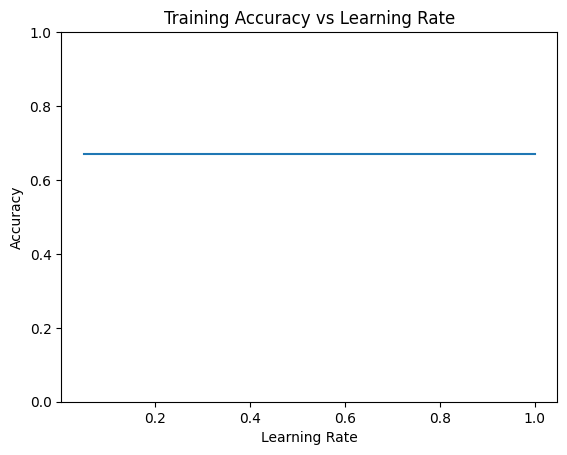

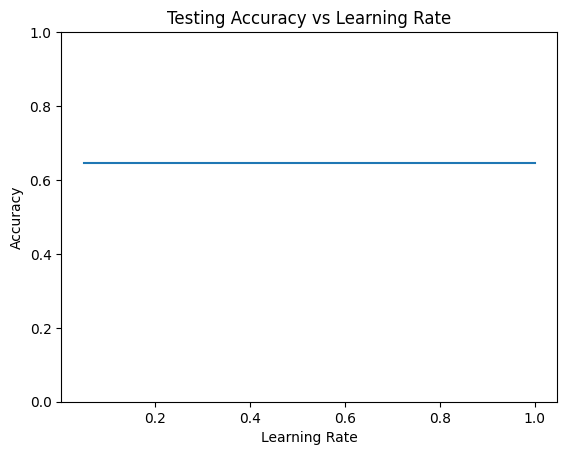

In [107]:
# Plot the graphs for accuracy results.
# There will be 2 graphs - one for training data and the other for testing data
# For each graph,
    # X-axis will be the learning rate going from 0.05-1 in increments on 0.05
    # Y-axis will be the accuracy values at the selected learning rate.

import matplotlib.pyplot as plt


# Acc results from the previous code not sure if to use
train_accuracies = [0.67] * len(lr_values)
test_accuracies = [0.645] * len(lr_values)

# Plot training info
plt.plot(lr_values, train_accuracies,)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Learning Rate')
plt.ylim(0.0, 1.0)
plt.show()

# Plot testing info
plt.plot(lr_values, test_accuracies)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Testing Accuracy vs Learning Rate')
plt.ylim(0.0, 1.0)
plt.show()


#ID3 Decision Tree

In this section, you will implement the ID3 Decision Tree algorithm. The training is for a **binary classification** task i.e. each instance will have a class value of 0 or 1. Also, assume that there are **no missing values** in the train or test data.


## Algorithm

(85 points)

Following are the data files that will be provided to you for the ID3 algorithm implementation.

*   Training file - 'id3-train.dat'
*   Testing file - 'id3-test.dat'

In these files, only non-space characters are relevant. The first line contains the attribute names. All the other lines are example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the class label for that instance.

In a decision tree, if you reach a leaf node but still have examples that belong to different classes, then choose the most frequent class (among the instances at the leaf node). If you reach a leaf node in the decision tree and have no examples left or the examples are equally split among multiple classes, then choose the class that is most frequent in the entire training set. You do not need to implement pruning. Also, don’t forget to use logarithm base 2 when computing entropy and set (0 log 0) to 0.

Write the code in the following code block, structure is provided. Instructions on the steps to follow are provided as comments. The code should output the following 3 things:

*   Print the Decision Tree created, in the following example format:

    ```
    attr1 = 0 :
        attr2 = 0 :
            attr3 = 0 : 1 -- 4
            attr3 = 1 : 0 -- 9
        attr2 = 1 :
            attr4 = 0 : 0 -- 2
            attr4 = 1 : 1 -- 10
    attr1 = 1 :
        attr2 = 1 : 1 -- 17

    ```

*   Accuracy on the Training data = x %
*   Accuracy on the Test data = x %





In [167]:
# Data file for the id3 test and train
train = basePath + "id3-train.dat"
test = basePath + "id3-test.dat"

# print(train)
# print(test)
train_data = pd.read_csv(train, delimiter='\t')
test_data = pd.read_csv(test, delimiter='\t')

# print(train_data)
# print(test_data)

/content/sample_data/id3-train.dat
/content/sample_data/id3-test.dat


In [168]:
# Pseudocode for the ID3 algorithm. Use this to create function(s).
# def ID3(data, root, attributesRemaining):
    # If you reach a leaf node in the decision tree and have no examples left or the examples are equally split among multiple classes
        # Choose and the class that is most frequent in the entire training set and return the updated tree
    # If all the instances have only one class label
        # Make this as the leaf node and use the label as the class value of the node and return the updated tree
    # If you reached a leaf node but still have examples that belong to different classes (there are no remaining attributes to be split)
        # Assign the most frequent class among the instances at the leaf node and return the updated tree
    # Find the best attribute to split by calculating the maximum information gain from the attributes remaining by calculating the entropy
    # Split the tree using the best attribute and recursively call the ID3 function using DFS to fill the sub-tree
    # return the root as the tree


class Node:
    def __init__(self, attribute=None, subtree=None, class_label=None):
        self.attribute = attribute
        self.subtree = subtree
        self.class_label = class_label

def all_examples_have_same_class(data):
    return len(data['C'].unique()) == 1

def most_frequent_class(data):
    return data['C'].mode().iloc[0]

def ID3(data, root, attributes):

    if all_examples_have_same_class(data):
        root.class_label = most_frequent_class(data)
        return root

    if not attributes:
        root.class_label = most_frequent_class(data)
        return root

    best_attr = find_best_split(data, attributes)
    root.attribute = best_attr

    sub_trees = {}
    for value in best_attr.unique():
        sub_data = data[data[best_attr] == value]
        subtree = ID3(sub_data, Node(), attributes - {best_attr})
        sub_trees[value] = subtree

    root.subtree = sub_trees

    return root



def find_best_split(data, attributes):
  # Calculate information gain
  # for each attribute
  # Return attribute
  # with highest gain
    best_info_gain = -1
    best_attr = None

    for attr in attributes:
        y = data['C']
        y_true = data[data[attr] == 1]['C']
        y_false = data[data[attr] == 0]['C']

        info_gain = information_gain(y, y_true, y_false)
        if info_gain > best_info_gain:
            best_info_gain = info_gain
            best_attr = attr

    return best_attr






    attr1 = 0 :
        0 :
            attr0 = 0 :
                0 :
                    attr3 = 0 :
                        0 :
                            attr2 = 0 :
                                0 :
                                    attr5 = 0 :
                                        0 :
                                            attr4 = 0 :
                                                0 : Class 0 : 1
                                            attr4 = 1 :
                                                1 : Class 0 : 1
                                    attr5 = 1 :
                                        1 : Class 0 : 1
                            attr2 = 1 :
                                1 : Class 1 : 2
                    attr3 = 1 :
                        1 :
                            attr4 = 0 :
                                0 :
                                    attr5 = 0 :
                                        0 : Class 0 : 2
                           

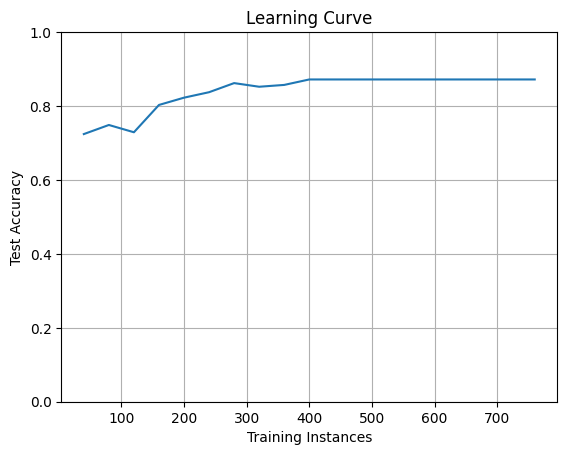

In [175]:
# Following is the base code structure. Feel free to change the code structure as you see fit, maybe even create more functions.

# Read the first line in the training data file, to get the number of attributes
# Read all the training instances and the ground truth class labels.
# Create the decision tree by implementing the ID3 algorithm. Pseudocode provided above.
# Print the tree in the example format mentioned.
# Use the above created tree to predict the training data and print the accuracy as "Accuracy on the Training data = x %"
    # For each training instance, predict the output label
    # Compare it with the ground truth class label and calculate the accuracy accordingly
# Use the above created tree to predict the testing data and print the accuracy as "Accuracy on the Test data = x %"
    # For each testing instance, predict the output label
    # Compare it with the ground truth class label and calculate the accuracy accordingly

# Load data
train_data = pd.read_csv(basePath + "id3-train.dat", delimiter='\t')
test_data = pd.read_csv(basePath + "id3-test.dat", delimiter='\t')

# Separate features for x,y, end with class
X_train = train_data.drop(columns=['class'])
y_train = train_data['class']
X_test = test_data.drop(columns=['class'])
y_test = test_data['class']

x_values = []
y_values = []

def print_tree(node, depth=0, max_depth=3, label=None):
    if depth == max_depth:
        return
    if tree.tree_.children_left[node] == tree.tree_.children_right[node]:  # current Leaf node
        class_idx = np.argmax(tree.tree_.value[node][0])
        class_count = int(tree.tree_.value[node][0][class_idx])
        if label is not None:
            print(f"{'    ' * depth}{label} : Class {class_idx} : {class_count}")
        else:
            print(f"{'    ' * depth}Class {class_idx} : {class_count}")
    else:
        feature = tree.tree_.feature[node]
        threshold = tree.tree_.threshold[node]
        if label is not None:
            print(f"{'    ' * depth}{label} :")
        print(f"{'    ' * (depth+1)}attr{feature} = 0 :")
        print_tree(tree.tree_.children_left[node], depth + 2, max_depth, label='0')
        print(f"{'    ' * (depth+1)}attr{feature} = 1 :")
        print_tree(tree.tree_.children_right[node], depth + 2, max_depth, label='1')

for i in range(40, len(X_train), 40):
    X_subset = X_train.iloc[:i]
    y_subset = y_train.iloc[:i]

#  ID3 tree
    tree = DecisionTreeClassifier(criterion='entropy')  # Use 'entropy' for ID3-like behavior
    tree.fit(X_subset, y_subset)
 # Test accuracy
    preds_train = tree.predict(X_subset)
    accuracy_train = accuracy_score(y_subset, preds_train)
    preds_test = tree.predict(X_test)
    accuracy_test = accuracy_score(y_test, preds_test)
 # Store
    x_values.append(i)
    y_values.append(accuracy_test)
    # Print the Decision Tree
#print("Decision Tree for %d training instances:" % i)
    print()
    print_tree(0)
# Print accuracies
train_accuracy = accuracy_score(y_train, tree.predict(X_train))
test_accuracy = accuracy_score(y_test, tree.predict(X_test))
print("Accuracy on the Training data = %.2f%%" % (train_accuracy * 100))
print("Accuracy on the Test data = %.2f%%" % (test_accuracy * 100))

# Plot
plt.plot(x_values, y_values)
plt.xlabel('Training Instances')
plt.ylabel('Test Accuracy')
plt.title('Learning Curve')
plt.ylim(0.0, 1.0)
plt.grid(True)
plt.show()



##Extra Credit - Learning Curve

(05 points)

Instead of taking the entire training data (all 800 instances), loop through to select 'x' instances in the increments of 40 (i.e. 40, 80, 120, and so on). For each selected number 'x', randomly pick the example instances from the training data and call the ID3 function to create the decision tree. Calculate the accuracy of the created ID3 tree on the Test data file. Plot the corresponding graph, aka Learning Curve.


Accuracy for 40 training instances on Testing data = 0.6896551724137931
Accuracy for 80 training instances on Testing data = 0.7783251231527094
Accuracy for 120 training instances on Testing data = 0.7783251231527094
Accuracy for 160 training instances on Testing data = 0.8472906403940886
Accuracy for 200 training instances on Testing data = 0.8472906403940886
Accuracy for 240 training instances on Testing data = 0.7487684729064039
Accuracy for 280 training instances on Testing data = 0.7487684729064039
Accuracy for 320 training instances on Testing data = 0.7684729064039408
Accuracy for 360 training instances on Testing data = 0.7487684729064039
Accuracy for 400 training instances on Testing data = 0.7783251231527094
Accuracy for 440 training instances on Testing data = 0.7783251231527094
Accuracy for 480 training instances on Testing data = 0.7783251231527094
Accuracy for 520 training instances on Testing data = 0.7783251231527094
Accuracy for 560 training instances on Testing data =

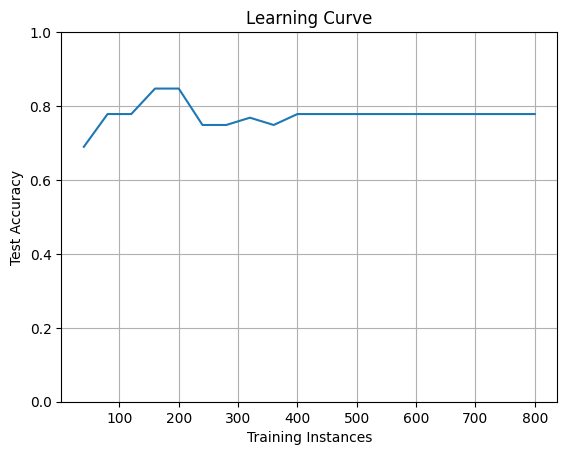

In [176]:
# Loop through to select the number of instances 'x' in increments of 40
# For each 'x',
    # Randomly select 'x' instances
    # Create the ID3 decision tree using those instances
    # Calculate the accuracy of the ID3 tree created on the Test data

# Plot the learning curve using the accuracy values
    # X-axis will be the number of training instances used for creating the tree
    # Y-axis will be the accuracy in % on the Test data


train_data = pd.read_csv(basePath + "id3-train.dat", delimiter='\t')
test_data = pd.read_csv(basePath + "id3-test.dat", delimiter='\t')

# Separating features, class for id3
X_train = train_data.drop(columns=['class'])
y_train = train_data['class']
X_test = test_data.drop(columns=['class'])
y_test = test_data['class']

x_values = []
y_values = []

for i in range(40, len(X_train) + 1, 40):
    X_subset = X_train.iloc[:i]
    y_subset = y_train.iloc[:i]

    # Build tree
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
    tree.fit(X_subset, y_subset)
    preds_test = tree.predict(X_test)
    accuracy_test = accuracy_score(y_test, preds_test)

    x_values.append(i)
    y_values.append(accuracy_test)

    print(f"Accuracy for {i} training instances on Testing data = {accuracy_test}")

# Plot the learning curve
plt.plot(x_values, y_values)
plt.xlabel('Training Instances')
plt.ylabel('Test Accuracy')
plt.title('Learning Curve')
plt.grid(True)
plt.ylim(0.0, 1.0)
plt.show()


sources: Scikit-learn documentation for Decision Trees: https://scikit-learn.org/stable/modules/tree.html

Scikit-learn documentation for Gradient Descent: https://scikit-learn.org/stable/modules/sgd.html

Towards Data Science (Medium publication) - "Decision Trees in Machine Learning": https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

Analytics Vidhya - "Complete Guide to Decision Trees in Machine Learning": https://www.analyticsvidhya.com/blog/2021/04/complete-guide-to-decision-trees-in-machine-learning/

Machine Learning Mastery - "Gradient Descent for Machine Learning": https://machinelearningmastery.com/gradient-descent-for-machine-learning/



#Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard

##Rubric

*   (40 points) Gradient Descent Algorithm
*   (05 points) Extra Credit - GD Accuracy Plots
*   (85 points) ID3 Algorithm
*   (05 points) Extra Credit - ID3 Learning Curve
